# Part A

## 1. Describe the importance of training and test data. Why do we separate data into these subsets?



The separation of data into training and test subsets allow us to evaluate models accurately. We use the training data to fit the model, allowing it to learn the underlying patterns in the data. Meanwhile, we use the test data, which the model does not see during training, to assess the model's performance. In this way, we can ensure that the model can generalize well to new and unseen data. And we prevent the model from overfiting problem: the model merely memorize the training data.

## 2. What is k-fold cross validation and what do we use it for?



K-fold cross-validation is a technique used to assess the  the performance of a model. In other words, we can use k-fold CV to evaluate the effectiveness of a machine learning model and to ensure that it generalizes well to independent data sets. K-fold CV requires us to divide the whole data set into 'k' smaller and non-overlapping subsets (as known as "folds"). Then we train The model on 'k-1' folds and validated on the remaining fold, and this process is repeated k times such that each fold serves as the validation testing set once. Finally, we average the testing results to compute a robust estimate of the model’s performance. This technique can help decreasing overfitting and utilizing the data efficiently for training and validation without sacrificing too much data as a hold-out set.


## 3. How is k-fold cross validation different from stratified k-fold cross validation?




The difference between standard k-fold and stratified k-fold cross-validation lies in how the data is split into folds. Stratified k-fold cross-validation ensures that each fold reflects the overall distribution of the target variable, particularly important in classification problems. This is crucial when dealing with imbalanced datasets where the target class distribution is not uniform. By preserving the percentage of samples for each class, stratified k-fold provides more reliable and stable evaluation metrics.

## 4. Name the 4 types of supervised learning models that we have learned thus far that are used to predict categorical dependent variables like whether an email is labeled “spam” or “not spam.”


- k-Nearest Neighbors (k-NN)
- Logistic Regression
- Decision Trees
- Support Vector Machines (SVM)

## 5. Name the 3 types of supervised learning models that we have learned thus far that are used to predict continuous dependent variables like test scores.



- Linear Regression (OLS)
- Lasso / Ridge Regression 
- Decision Trees / Random Forest  (for regression tasks)

# Part B

## 1. Import the spam dataset and print the first six rows.




In [15]:
import pandas as pd

df = pd.read_csv('spam_dataset.csv')
df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


## 2. Read through the documentation of the original dataset here:
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names. <br>
The dependent variable is "spam," where one indicates that an email is spam and zero otherwise. Which three variables in the dataset do you think will be important predictors in a model of spam? Why?


Chosen variables are:
- `word_freq_free`: Spam messages often include words like "free" as a common tactic to attract attention.
- `word_freq_money`: If a spam message does not mention "free", it is likely to mention words like "money" as substitute that attract people. Examples are like financial schemes or promotions.
- `char_freq_$` : Sometimes a spam message will replace the word "money" by direct money amount with "$". 

In short, including these three variables should account for most spam messages.

## 3. Visualize the univariate distribution of each of the variables in the previous question.

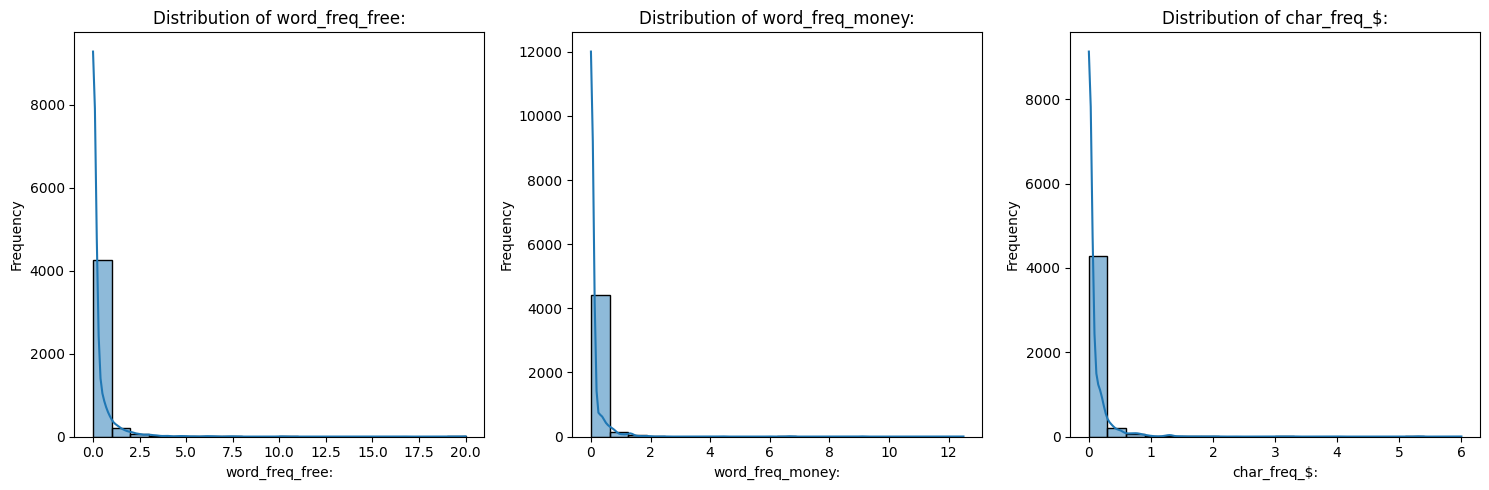

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the variables of interest
spam_variable = ['word_freq_free:', 'word_freq_money:', 'char_freq_$:']

# Plotting each variable
plt.figure(figsize=(15, 5)) 
for i, variable in enumerate(spam_variable, start=1):
    plt.subplot(1, 3, i)
    sns.histplot(df[variable], kde=True, bins=20)
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
plt.tight_layout() # Make sure graphs won't overlap
plt.show()

## 4. Choose one model from Part A Question 4. 
Split the data into training and test subsets. Build a model with the three variables in the dataset that you think will be good predictors of "spam." Run the model and evaluate prediction error using k-fold cross-validation. Describe why you chose any particular parameters for your model (e.g., if you used KNN, how did you decide to choose a specific value for k).

#### KNN

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Assuming df, spam_variable and 'spam' are already defined and available
X = df[spam_variable]
y = df['spam']

# Split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features for KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set up the range of k values to test
k_range = list(range(1, 21))  # Testing k from 1 to 20

# Create a dictionary of all values we want to test for n_neighbors
param_grid = dict(n_neighbors=k_range)

# Use GridSearchCV to test all values for n_neighbors, using F1-score as the metric
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='f1_weighted')  # 10-fold cross-validation

# Fit the grid with data
grid.fit(X_train, y_train)

# View the best parameters and best F1 score
print("Best K Value: ", grid.best_params_)
print("Best Cross-Validation F1 Score: ", grid.best_score_)

# Use the best parameters to make predictions
knn_best = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

# Evaluate on test data using F1-score
print("Test F1 Score: ", f1_score(y_test, y_pred, average='weighted'))

# Get precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'])
print("\nOptimized KNN Classification Report:\n", report)

Best K Value:  {'n_neighbors': 9}
Best Cross-Validation F1 Score:  0.8514227636715027
Test F1 Score:  0.8427433225396077

Optimized KNN Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.83      0.92      0.88       676
        Spam       0.87      0.73      0.80       475

    accuracy                           0.85      1151
   macro avg       0.85      0.83      0.84      1151
weighted avg       0.85      0.85      0.84      1151



The choice of `k=9` is often used as a starting point because it is small enough to provide reasonably low bias and large enough to avoid the most extreme effects of noise. When choosing a k that is too small, the model becomes highly sensitive to noise in the training data, leading to overfitting problem. Conversely, a very large k leads to underfitting, where the model becomes overly generalized. 



NOTE: <br>
1. Since false positives (marking good mail as spam) are very undesirable (as mentioned in the desciption text), I compute a classification report that include `precision` (aims to minimize false positives) and `f1-score` (commonly a good standard). <br>

## 5. Repeat the previous question but with a different model from Part A Question 4.

#### Logistics Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# To find best parameter, I will use GridSearchCV, which automatically performs cross-validation as part of its process to evaluate the performance
# Define parameter grid for 'C' values
param_grid_log = {'C': [0.01, 0.1, 1, 10, 100]}

# Setup the grid search with LogisticRegression and f1_weighted scoring
grid_log = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
                    param_grid_log, cv=10, scoring='f1_weighted')

# Fit grid search to the training data
grid_log.fit(X_train, y_train)

# Output the best parameters and the best score from the grid search
print("Best C Value:", grid_log.best_params_)
print("Best Cross-Validation F1 Score:", grid_log.best_score_)

# Evaluate using the best model found from the grid search
best_log_reg = grid_log.best_estimator_
y_pred_log = best_log_reg.predict(X_test)

# Calculate F1-score on the test data
test_f1_score = f1_score(y_test, y_pred_log, average='weighted')
print("Test F1 Score:", test_f1_score)

# Get precision, recall, and F1-score
report_log = classification_report(y_test, y_pred_log, target_names=['Not Spam', 'Spam'])
print("\nLogistic Regression Classification Report with L1 Penalty:\n", report_log)


Best C Value: {'C': 1}
Best Cross-Validation F1 Score: 0.8119114117025694
Test F1 Score: 0.7942712694722728

Logistic Regression Classification Report with L1 Penalty:
               precision    recall  f1-score   support

    Not Spam       0.76      0.97      0.85       676
        Spam       0.92      0.58      0.71       475

    accuracy                           0.81      1151
   macro avg       0.84      0.77      0.78      1151
weighted avg       0.83      0.81      0.79      1151



I choose L1 penalty because:
* L1 penalty helps focus the model's decision-making on the most significant predictors. This is critical in cases like spam detection, where certain keywords or characteristics are more predictive of spam than others.

I choose C = 1 because:
* Obviously, grid search showed that it is the best one
* A `C` value of 1 provides a moderate level of regularization. It is neither too strong (which might lead to underfitting by overly simplifying the model) nor too weak (which could cause overfitting by allowing the model to be too complex).

## 6. Repeat the previous question but with a different model from Part A Question 4.

#### Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Define parameter grid for the decision tree
param_grid_tree = {
    'max_depth': [None, 5, 10, 15, 20],  # Test various depths
    'min_samples_split': [2, 5, 10, 20],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 5, 10]     # Minimum number of samples required at a leaf node
}

# Setup the grid search with DecisionTreeClassifier and f1_weighted scoring
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=10, scoring='f1_weighted')

# Fit grid search to the training data
grid_tree.fit(X_train, y_train)

# Output the best parameters and the best score from the grid search
print("Best Parameters:", grid_tree.best_params_)
print("Best Cross-Validation F1 Score:", grid_tree.best_score_)

# Evaluate using the best model found from the grid search
best_tree = grid_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)

# Calculate F1-score on the test data
test_f1_score = f1_score(y_test, y_pred_tree, average='weighted')
print("Test F1 Score:", test_f1_score)

# Get precision, recall, and F1-score
report_tree = classification_report(y_test, y_pred_tree, target_names=['Not Spam', 'Spam'])
print("\nDecision Tree Classification Report:\n", report_tree)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation F1 Score: 0.8464811042162067
Test F1 Score: 0.8443303623756124

Decision Tree Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.83      0.93      0.88       676
        Spam       0.88      0.73      0.80       475

    accuracy                           0.85      1151
   macro avg       0.85      0.83      0.84      1151
weighted avg       0.85      0.85      0.84      1151



1. max_depth: 10
* A max_depth of 10 prevents the tree from becoming too complex and overfitting while allowing it to learn sufficient details from the data to make accurate predictions. This depth strikes a balance between capturing complex patterns and maintaining good generalization to new data.

2. min_samples_leaf: 5
* Setting min_samples_leaf to 5 helps ensure that each leaf node has enough data points to make a reliable decision, thus reducing the model's sensitivity to noise and outliers. This setting promotes model stability and prevents overfitting by not allowing overly specific branching.

3. min_samples_split: 2
* min_samples_split set at 2 offers the tree flexibility to grow complex enough to detect subtle data variances but is balanced by the constraints set by max_depth and min_samples_leaf, ensuring the tree does not overfit minor fluctuations in the data.

## 7. Repeat the previous question but with a different model from Part A Question 4.

#### SVM

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Test different C values
    'kernel': ['linear']  
}

# Setup the grid search with SVM and f1_weighted scoring
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=10, scoring='f1_weighted', verbose=1)

# Fit grid search to the training data
grid_svm.fit(X_train, y_train)

# Output the best parameters and the best score from the grid search
print("Best Parameters:", grid_svm.best_params_)
print("Best Cross-Validation F1 Score:", grid_svm.best_score_)

# Evaluate using the best model found from the grid search
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Calculate F1-score on the test data
test_f1_score = f1_score(y_test, y_pred_svm, average='weighted')
print("Test F1 Score:", test_f1_score)

# Get precision, recall, and F1-score for the test set
report_svm = classification_report(y_test, y_pred_svm, target_names=['Not Spam', 'Spam'])
print("\nSVM Classification Report with Additional Variables:\n", report_svm)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Parameters: {'C': 10, 'kernel': 'linear'}
Best Cross-Validation F1 Score: 0.8233223394149004
Test F1 Score: 0.8285432993232638

SVM Classification Report with Additional Variables:
               precision    recall  f1-score   support

    Not Spam       0.80      0.96      0.87       676
        Spam       0.92      0.65      0.77       475

    accuracy                           0.83      1151
   macro avg       0.86      0.81      0.82      1151
weighted avg       0.85      0.83      0.83      1151



1. kernel = linear
* The linear kernel is generally more conservative with less overfitting, which can be advantageous when false positives are particularly undesirable.

2. C = 10
* The C value of 10 chosen for the SVM model indicates less regularization, allowing the model to fit the training data more closely and capture complex patterns effectively. This choice reflects a balance between risk and reward: while a lower regularization strength (higher C) increases the risk of overfitting, it was necessary to optimize the F1-score by allowing the model to detail adequately within your dataset's complexities. 

## 8. Now rerun all 4 models with 3 additional variables that you think will help the prediction accuracy. Did this cause the performance to improve over your previous models?

I add `word_freq_your`, `word_freq_our`, and `capital_run_length_average` as the additional variables.

In [9]:
# Define new variable set
spam_var_new = ['word_freq_free:', 'word_freq_money:', 'char_freq_$:', 'word_freq_your:', 'word_freq_our:', 'capital_run_length_average:']

# Define X and y
X = df[spam_var_new]
y = df['spam']

# Split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features for KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### KNN

In [10]:
# Set up the range of k values to test
k_range = list(range(1, 21))  # Testing k from 1 to 20

# Create a dictionary of all values we want to test for n_neighbors
param_grid = dict(n_neighbors=k_range)

# Use GridSearchCV to test all values for n_neighbors, using F1-score as the metric
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='f1_weighted')  # 10-fold cross-validation

# Fit the grid with data
grid.fit(X_train, y_train)

# View the best parameters and best F1 score
print("Best K Value: ", grid.best_params_)
print("Best Cross-Validation F1 Score: ", grid.best_score_)

# Use the best parameters to make predictions
knn_best = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

# Evaluate on test data using F1-score
print("Test F1 Score: ", f1_score(y_test, y_pred, average='weighted'))

# Get precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'])
print("\nOptimized KNN Classification Report:\n", report)

Best K Value:  {'n_neighbors': 15}
Best Cross-Validation F1 Score:  0.8659960460410796
Test F1 Score:  0.8725501925129284

Optimized KNN Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.86      0.93      0.90       676
        Spam       0.89      0.79      0.84       475

    accuracy                           0.87      1151
   macro avg       0.88      0.86      0.87      1151
weighted avg       0.88      0.87      0.87      1151



KNN Change:
* Best Cross-Validation F1 Score improves from 0.851 to 0.866
* Test F1 Score improves DECENTLY from 0.843 to 0.873

#### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# To find best parameter, I will use GridSearchCV, which automatically performs cross-validation as part of its process to evaluate the performance
# Define parameter grid for 'C' values
param_grid_log = {'C': [0.01, 0.1, 1, 10, 100]}

# Setup the grid search with LogisticRegression and f1_weighted scoring
grid_log = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
                    param_grid_log, cv=10, scoring='f1_weighted')

# Fit grid search to the training data
grid_log.fit(X_train, y_train)

# Output the best parameters and the best score from the grid search
print("Best C Value:", grid_log.best_params_)
print("Best Cross-Validation F1 Score:", grid_log.best_score_)

# Evaluate using the best model found from the grid search
best_log_reg = grid_log.best_estimator_
y_pred_log = best_log_reg.predict(X_test)

# Calculate F1-score on the test data
test_f1_score = f1_score(y_test, y_pred_log, average='weighted')
print("Test F1 Score:", test_f1_score)

# Get precision, recall, and F1-score
report_log = classification_report(y_test, y_pred_log, target_names=['Not Spam', 'Spam'])
print("\nLogistic Regression Classification Report with L1 Penalty:\n", report_log)

Best C Value: {'C': 100}
Best Cross-Validation F1 Score: 0.8328739454170024
Test F1 Score: 0.8413694565699299

Logistic Regression Classification Report with L1 Penalty:
               precision    recall  f1-score   support

    Not Spam       0.82      0.95      0.88       676
        Spam       0.90      0.70      0.79       475

    accuracy                           0.85      1151
   macro avg       0.86      0.82      0.83      1151
weighted avg       0.85      0.85      0.84      1151



Logistic Regression Change:
* Best Cross-Validation F1 Score improves from 0.812 to 0.833
* Test F1 Score SIGNIFICANTLY improves from 0.794 to 0.841 !!!

#### Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Define parameter grid for the decision tree
param_grid_tree = {
    'max_depth': [None, 5, 10, 15, 20],  # Test various depths
    'min_samples_split': [2, 5, 10, 20],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 5, 10]     # Minimum number of samples required at a leaf node
}

# Setup the grid search with DecisionTreeClassifier and f1_weighted scoring
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=10, scoring='f1_weighted')

# Fit grid search to the training data
grid_tree.fit(X_train, y_train)

# Output the best parameters and the best score from the grid search
print("Best Parameters:", grid_tree.best_params_)
print("Best Cross-Validation F1 Score:", grid_tree.best_score_)

# Evaluate using the best model found from the grid search
best_tree = grid_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)

# Calculate F1-score on the test data
test_f1_score = f1_score(y_test, y_pred_tree, average='weighted')
print("Test F1 Score:", test_f1_score)

# Get precision, recall, and F1-score
report_tree = classification_report(y_test, y_pred_tree, target_names=['Not Spam', 'Spam'])
print("\nDecision Tree Classification Report:\n", report_tree)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation F1 Score: 0.8727852012694758
Test F1 Score: 0.8517984490813706

Decision Tree Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.83      0.94      0.88       676
        Spam       0.90      0.73      0.81       475

    accuracy                           0.85      1151
   macro avg       0.87      0.84      0.84      1151
weighted avg       0.86      0.85      0.85      1151



Decision Tree Change:
* Best Cross-Validation F1 Score improves DECENTLY from 0.846 to 0.873
* Test F1 Score improves from 0.844 to 0.852

#### SVM

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Test different C values
    'kernel': ['linear']  
}

# Setup the grid search with SVM and f1_weighted scoring
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=10, scoring='f1_weighted', verbose=1)

# Fit grid search to the training data
grid_svm.fit(X_train, y_train)

# Output the best parameters and the best score from the grid search
print("Best Parameters:", grid_svm.best_params_)
print("Best Cross-Validation F1 Score:", grid_svm.best_score_)

# Evaluate using the best model found from the grid search
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Calculate F1-score on the test data
test_f1_score = f1_score(y_test, y_pred_svm, average='weighted')
print("Test F1 Score:", test_f1_score)

# Get precision, recall, and F1-score for the test set
report_svm = classification_report(y_test, y_pred_svm, target_names=['Not Spam', 'Spam'])
print("\nSVM Classification Report with Additional Variables:\n", report_svm)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Parameters: {'C': 10, 'kernel': 'linear'}
Best Cross-Validation F1 Score: 0.8355987643869686
Test F1 Score: 0.8376078913343437

SVM Classification Report with Additional Variables:
               precision    recall  f1-score   support

    Not Spam       0.81      0.96      0.88       676
        Spam       0.92      0.68      0.78       475

    accuracy                           0.84      1151
   macro avg       0.86      0.82      0.83      1151
weighted avg       0.85      0.84      0.84      1151



SVM Change:
* Best Cross-Validation F1 Score improves from 0.823 to 0.836
* Test F1 Score DECREASE from 0.844 to 0.838 !!!

Conclusion:
* Decision Tree model show the most significant improvements (around 0.05+ in f1 score) from adding additional features, so these models benefit the most from richer feature sets for spam classification. 
* KNN and Logistic Regression show improvements some decent level (around 0.03), so there is some benefit recognized.
* SVM shows NEGATIVE improvement, meaning that the new variables might not have provided information that allows these models to clearly distinguish between categories in a linear fashion.

## 9. What is a variable that isn't available in this dataset but you think could increase your final model's predictive power if you had it? Why do you think it would improve your model?


A valuable variable that isn't included in the dataset is the `geographical location of the sender's IP address`. Adding this variable could significantly enhance the model's predictive capability since:
* Regional Trends: Spam emails often originate from specific regions known for `hosting spam servers`. Some regions are more likely to be the source of spam email since corresponding governmental policy/enforcement regarding spam is weak there.
* Inconsistent Locations: If the geographical location of the sender frequently changes or doesn't match known legitimate sources for a sender, it is likely that the sender is a spam source.